# Interactive Histogram of Roman Amphitheater Capacities

Execute the three cells in order. That will load data and then create an interactive histogram at bottom of page. Slide upper and lower ranges to control which capacities appear in histogram.

In [1]:
from urllib.request import urlopen
from rdflib import Graph, plugin
import pandas as pd
import matplotlib.pyplot as plt

from ipywidgets import widgets,interact
from IPython.display import display, HTML, clear_output

In [4]:
# jsonld+geojson amphitheater data
json_data = urlopen("http://sfsheath.github.io/roman-amphitheaters/roman-amphitheaters.geojson")
g = Graph().parse(data=json_data.read(), format='json-ld')

IntSlider(value=19000, continuous_update=False, description='Lower limit:', max=55000, min=2000, step=1000)

IntSlider(value=45000, continuous_update=False, description='Upper limit:', max=55000, min=2000, step=1000)

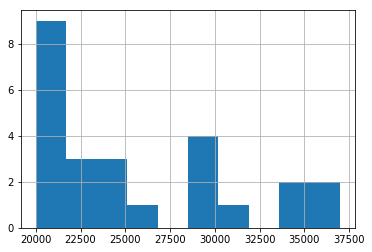

In [7]:
# functin that handles changes to sliders and creates histogram
def on_value_change(change=0): # change isn't used but will be passewd so there has to be a placeholder
    global low_widget
    global high_widget
    global lower_range
    global upper_range
    
    lower_range = low_widget.value
    upper_range = high_widget.value

    results = g.query("""
PREFIX ramphs: <http://purl.org/roman-amphitheaters/resource/>
PREFIX gj: <https://purl.org/geojson/vocab#>
PREFIX ramphs-p: <http://purl.org/roman-amphitheaters/properties#>
PREFIX dcterms: <http://purl.org/dc/terms/>
SELECT ?title ?capacity WHERE {

?s gj:properties/ramphs-p:capacity/ramphs-p:quantity ?capacity .

FILTER ((?capacity > %s) )
FILTER (?capacity < %s)
}""" % (lower_range, upper_range ) )

    caps = []
    for row in results:
        caps.append(float(row.capacity))
    ramphs_pd = pd.Series({'capacity':caps})
    
    clear_output()
    low_widget = widgets.IntSlider(value=lower_range,
                               min=2000,
                               max=55000, step = 1000,
                               description="Lower limit:",
                               continuous_update=False)
    high_widget = widgets.IntSlider(value=upper_range,
                                min=2000, max=55000,
                                step = 1000,
                                description="Upper limit:",
                                continuous_update=False)
    low_widget.observe(on_value_change, names='value')
    high_widget.observe(on_value_change, names='value')
    
    display(low_widget, high_widget)
    ramphs_pd.hist()

# initialize (a little repetetive)
low_widget = widgets.IntSlider(value=7500,
                               min=2000,
                               max=55000,
                               step = 1000,
                               description="Lower limit:",
                               continuous_update=False)
high_widget = widgets.IntSlider(value=55000,
                                min=2000, 
                                max=55000,
                                step = 1000,
                                description="Upper limit:",
                                continuous_update=False)

low_widget.observe(on_value_change, names='value')
high_widget.observe(on_value_change, names='value')

display(low_widget, high_widget)
on_value_change()
